In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

%matplotlib notebook

# Classification with a Perceptron

##### Version 0.1

***

By AA Miller (Northwestern/CIERA)  
21 February 2022

Perceptrons are a type of articifical neuron. We will construct a basic neuron in pure python today and use it to classify data in a "simple" two class problem. 

Consider the following image - what do you see? 

<img style="display: block; margin-left: auto; margin-right: auto" src="images/number8.png" width="450" align="middle">
<div align="right"> <font size="-3">(data credit: MNIST) </font></div>

Without hesitation, I am certain that you were able to identify the above image as the number 8.

**Breakout Problem 1**

Using everything we have learned this week about machine learning – devise how to use the Random Forest algorithm to build a binary classifier to separate the number 8 from other handwritten digits. 

*Take a few minutes to discuss with your partner*

There are many possible approaches - 


  -  build an algorithm that identifies "circles"   
  $~~~~$(number 3 does not have fully closed circles)

  -  build an algorithm that indentifies lines  
  $~~~~$(number 4 is only straight lines)

  -  examine only the bottom half of the image  
  $~~~~$(tops of 8 and 9 are similar, but bottoms different)

At this point we only have a few features, they are all very complex to derive, and it isn't at all clear that we would successfully separate 8 and 0.

In sum, we are on the road towards success.

And yet,  

when you looked at the image of the 8, you immediately recognized the contents of the image at the start of this lecture.

We each have a super computer in our heads. One trained over many, many generations of evolution to immediately recognize what is right in front of our eyes. Constructing "rules" (especially very *precise* rules) to teach a computer to make the same recognition is extremely challenging. 

For complex tasks, like computer vision/classifying handwritten digits, we need a *new* type of machine learning relative to what we discussed earlier this week.

(We will need deep learning to accomplish this task. We will develop these ideas over the next three days.)

To start that process, I would like to introduce the *perception* – an artificial neuron.

I'm no biologist, here's my (over-simplified) model of a biological neuron: a neuron receives multiple inputs (from other neurons or other signals present within the body), then weighs the relative information before becoming "activated" and further sending signals, or remaining dormant. 

(It is often said in popular literature that deep learning is designed to work like the human brain. 

This is very inaccurate, instead it is far more appropriate to say that the principles behind deep learning are inspired by our biological understanding of how the brain works. There is a lot that we do not understand about the brain, and it is worthwhile to remember this distinction.)

## Problem 1) The Perceptron

A perceptron takes several binary inputs, $x_1, x_2, \ldots, x_n$, and, ultimately,  produces a single binary output. 

Each input has a relevant weight, $w_1, w_2, \ldots, w_n$, which is multiplied by its corresponding input, before taking the sum of all the weighted inputs and comparing that to some threshold. 

If the weighted sum is greater than the threshold, then the output $= 1$ and the perceptron is "activated."

Otherwise the output $= 0$.

Here is a graphical representation of the perceptron:

<img style="display: block; margin-left: auto; margin-right: auto" src="images/perceptron.png" width="650" align="middle">
<div align="right"> <font size="-3">(credit: https://towardsdatascience.com/the-perceptron-3af34c84838c) </font></div>

Here is a mathematical representation of the perceptron: 



$$\mathrm{output} = \left\{ \begin{array}{lcr}
0 & \mathrm{if} \; \sum_n x_n w_n & \le \mathrm{threshold} \\
1 & \mathrm{if} \; \sum_n x_n w_n & > \mathrm{threshold}
\end{array}\right.
$$

A single perceptron can be used to answer questions that rely on many varied inputs. 

Consider the question: "Should I walk the dog?"

The answer to that question depends on other questions: 
  -  Is it raining? 
  -  Is the dog asleep?
  -  Has is been more than 6 hours since the dog last went outside?

Ultimately we need a binary output (to walk the dog, or not walk the dog) based on several binary inputs. In other words, we can use a perceptron to determine whether to walk the dog. 

**Problem 1a**

Write a function `walk_dog` that acts as a perceptron to decide whether or not you should walk the dog. 

The function should take three arugments, a tuple with the binary answer to your three questions, an optional tuple with the relative weights for each input (default = `(-2, -1, 5)`), and an optional threshold (default = `2.5`). 

In [ ]:
def walk_dog(questions, weights=np.array([-2,-1,5]), threshold=2.5):
    '''Perceptron to calculate whether we should walk the dog
    
    Parameters
    ----------
    questions : array-like, size = 3
    weights : array-lik, optional (default = np.array([-2, -1, 5]))
    threshold : float, optional (default = 2.5)
        decision threshold for whether to walk the dog or not
    
    Returns
    -------
    walk : bool
        Boolean variable to indicate whether to walk the dog
    '''
    return (questions*weights).sum()>threshold
    

**Problem 1b**

Use the newly created perceptron to determine whether to walk the dog if: 
  1. it is raining outside
  2. the dog is asleep
  3. the dog last went out 2.5 hours ago

*Hint* - recall that the inputs should be binary.

In [ ]:
walk_dog([1,1,0])

False

**Problem 1c**

After sleeping for four hours, it is still raining, but the dog wakes up (i.e., it has been 6.5 hr since the dog last went out). Should you walk the dog?

*Hint* - recall that the inputs should be binary.

In [ ]:
walk_dog(np.array([True, False, True]))

True

## Problem 2) Generic Perceptron

We can simplify our representation of the perceptron by replacing the sum with a dot product, $w_n \cdot x_n = \sum_n w_n x_n$, and we can move the threshold to the other side of the inequality, which we will now refer to as the bias $b$. 

$$\mathrm{output} = \left\{ \begin{array}{lcr}
0 & \mathrm{if} \; w_n \cdot x_n + b & \le 0 \\
1 & \mathrm{if} \; w_n \cdot x_n + b & > 0
\end{array}\right.
$$

(in this notation, the bias can be thought of how easy it is for the neuron to be activated)

Now, build a generic perceptron that can take any collection of input signals and weights, as well as a bias, to determine the binary output from the artificial neuron.

(this will prove useful for more than just walking the dog)

**Problem 2a**

Write a generic function `perceptron` that takes as input arrays called `signals` and `weights` as well as a float called `bias`. The function should return a boolean indicating whether or not the perceptron is "activated". 

In [ ]:
def perceptron(signals, weights, bias):
    '''Generic perceptron function
    
    Parameters
    ----------
    signals : array-like
        the input signals for the perceptron
        
    weights : array-like
        the weight applied to each input
        
    bias : float
        the value required for activation
        
    Returns
    -------
    activated : bool
        whether or not the perceptron is activated
    '''
    return (signals*weights).sum() + bias > 0

**Problem 2b** 

Is the perceptron activated if the signal = [2.3, 5.3, 1.2, 3.4], the weights = [-3, 2, 0.5, -1], and no bias (i.e., bias = 0)?

In [ ]:
perceptron(np.array([2.3, 5.3, 1.2, 3.4]), np.array([-3, 2, 0.5, -1]), 0)

**Problem 2c** 

What if the signal and weights do not change but the bias = -2? 

In [ ]:
perceptron(np.array([2.3, 5.3, 1.2, 3.4]), np.array([-3, 2, 0.5, -1]), -2)

## Problem 3) Perceptrons for classification

Perceptrons can be used for binary classification problems!

(perhaps this is no surprise given that this session is about machine learning...)

To demonstrate how this works we will generate some synthetic two-dimensional data, but the principle can easily be scaled to an arbitrarily large number of dimensions. 

We use `scikit-learn` to simulate two classes in a 2d plane using the [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function. We will only include 30 samples so the data are easy to visualize.

In [ ]:
X, y = make_blobs(n_samples=30, centers=2, n_features=2,
                  center_box = (0,4), random_state=1885)

print(y)
print(X)

[0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1]
[[ 2.20187926  1.55037904]
 [ 4.61538729  1.14450927]
 [ 2.1929474   1.83456433]
 [ 1.5681177   1.58694447]
 [ 1.98132744  1.65751725]
 [ 5.03620906  1.61503562]
 [ 2.86620844  2.89965862]
 [ 1.43787012  0.94988095]
 [ 0.75290866  2.07120745]
 [ 2.92771666  4.87712949]
 [ 3.784991    2.04930521]
 [ 4.86749519  4.20276048]
 [ 1.17712566  3.61299453]
 [ 2.55408788  2.9633318 ]
 [ 4.406073    2.8978758 ]
 [ 0.51623392  1.00934356]
 [ 4.34192922  2.84070811]
 [ 3.60063604  2.73137418]
 [ 3.61168713  1.9170854 ]
 [ 3.22477071 -0.52290224]
 [ 0.24054413  1.04043617]
 [ 1.09711747  1.41997873]
 [ 5.35810136  2.0182261 ]
 [ 3.91322311  3.83965253]
 [ 1.25016773  3.12253937]
 [ 2.06046987  2.49174079]
 [ 1.83529855  0.51150602]
 [ 0.90370806  1.33785384]
 [ 3.41063473  2.8947868 ]
 [ 4.46362621  2.4463212 ]]


<IPython.core.display.Javascript object>


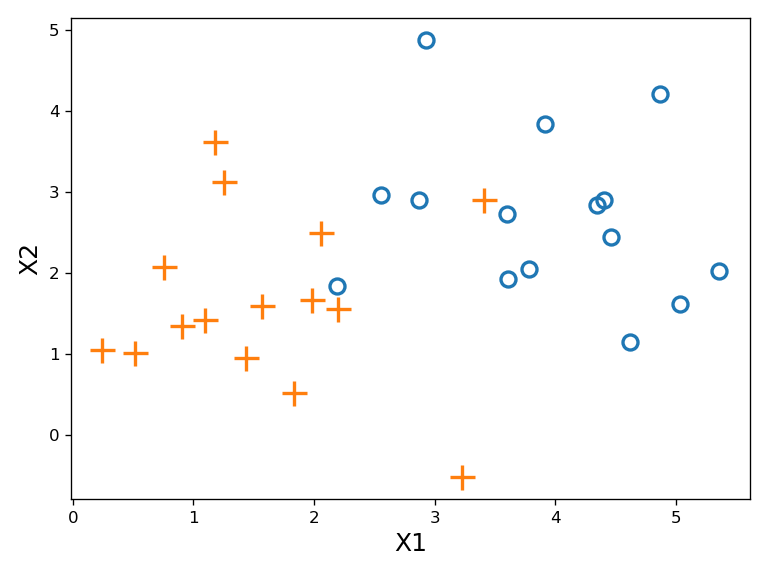

In [ ]:
fig, ax = plt.subplots()
activated = y == 1
ax.plot(X[activated,0], X[activated,1], 'o', 
        ms = 9, mew=2, mfc='None')
ax.plot(X[~activated,0], X[~activated,1], '+', 
        ms=15, mew=2)
ax.set_xlabel('X1', fontsize=15)
ax.set_ylabel('X2', fontsize=15)
fig.tight_layout()

How can we use a perceptron to classify this data? 

In this case we have two inputs, and thus two weights, plus the bias to determine whether the perceptron is activated (class = 1, the open circles in the previous plot).

We also have 30 observations that we can use to train the algorithm.

For a perceptron, training means updating the weights to better reflect the training data. 

Here's the pseudo-code: 
  1. Apply the perceptron to one of the data points
  2. Adjust the weights if the perceptron makes an incorrect classification
  3. Repeat this procedure over all N datapoints
  4. Repeat this procedure for M iterations

How do we adjust the weights? For every sample we evaluate the model error (is the classification correct or not). We then adjust the weight to reduce the error for the following prediction. 

For a perceptron, these updates can be calculated simply as: 

$$w_\mathrm{updated} = w_\mathrm{current} + \eta\,\, (y_\mathrm{true} - y_\mathrm{pred})\,\, x,$$

where $w_\mathrm{updated}$ is the new value for the weight, $w_\mathrm{current}$ is the current value for the weight, $\eta$ is the called the *learning rate*, $x$ is the value of the input signal, and $(y_\mathrm{true} - y_\mathrm{pred})$ captures whether or not the classification was correct.

The learning rate is a small number that adjusts the weight in the direction of being more accurate. It is selected by the user, though familiar tricks like cross validation can be used to identify an optimal size. 

To train the perceptron, we need to decide the total number of iterations $M$ to pass through the training data. These iterations are called *epochs*. Within each epoch, we update the weights and bias to improve our predictions on the generated data. 

Updating the bias is similar to updating the weights, but we exclude the value of the input $x$ as this does not affect the bias.

**Problem 3a**

Write a function `train_perceptron` that accepts as input `X`, `y`, `weights`, `bias`, `epochs`, and `learning rate`. The function should train the perceptron for $M$ epochs. During each epoch, the weights and bias should be updated using the equation given above while looping over every source in the training set. 

*Hint* – it is useful to track the number of misclassifications that occur during each epoch. 

*Hint 2* – for this problem we only care about training, but if you eventually wanted to classify data with the perceptron then you would need to extract the weights and bias from the function, or, even better, write the perceptron as a class object that be trained and also classify (similar to scikit-learn). 

In [ ]:
def train_perceptron(X, y, weights, bias, epochs, learning_rate):
    '''Train a perceptron to classify binary labels via numerical features
    
    Parameters
    ----------
    X : array-like
        Feature array for the data, in the style of scikit-learn
    y : array-like, type = bool
        Label array for the data
    weights : array-like
        Weights for the input signals to the perceptron
    bias : array-like
        Bias value for the perceptron
    epochs : int
        Number of instances for training the perceptron
    learning_rate : float
        Relative step size for tuning the weights and bias
    '''
    for i in range(epochs):
        n_wrong=0
        for j in range(X.shape[0]):
            y_pred = int(perceptron(X[j,:], weights, bias))
            if y_pred != y[j]:
                n_wrong+=1
                weights += learning_rate*(y[j]-y_pred)*X[j,:]
                bias += learning_rate*(y[j]-y_pred)
        print(n_wrong)
    return (weights, bias)

def train_perceptron2(X, y, weights, bias, epochs):
    '''Train a perceptron to classify binary labels via numerical features
    
    Parameters
    ----------
    X : array-like
        Feature array for the data, in the style of scikit-learn
    y : array-like, type = bool
        Label array for the data
    weights : array-like
        Weights for the input signals to the perceptron
    bias : array-like
        Bias value for the perceptron
    epochs : int
        Number of instances for training the perceptron
    learning_rate : float
        Relative step size for tuning the weights and bias
    '''
    learning_rate=0.005
    for i in range(epochs):
        n_wrong=0
        for j in range(X.shape[0]):
            y_pred = int(perceptron(X[j,:], weights, bias))
            if y_pred != y[j]:
                n_wrong+=1
                weights += learning_rate*(y[j]-y_pred)*X[j,:]
                bias += learning_rate*(y[j]-y_pred)
        print(n_wrong)
        if n_wrong<5:
            learning_rate=0.001
    return (weights, bias)
            
def train_perceptron3(X, y, weights, bias, epochs, learning_rate):
    '''Train a perceptron to classify binary labels via numerical features
    
    Parameters
    ----------
    X : array-like
        Feature array for the data, in the style of scikit-learn
    y : array-like, type = bool
        Label array for the data
    weights : array-like
        Weights for the input signals to the perceptron
    bias : array-like
        Bias value for the perceptron
    epochs : int
        Number of instances for training the perceptron
    learning_rate : float
        Relative step size for tuning the weights and bias
    '''
    for i in range(epochs):
        
        for j in range(X.shape[0]):
            y_pred = int(perceptron(X[j,:], weights, bias)) 
            if y_pred != y[j]:
                #NWRONG SHOULD BE CALCULATED AT END, AFTER WEIGHTS FIXED AT END OF EPOCH
                print(X[j,:])
                weights += learning_rate*(y[j]-y_pred)*X[j,:]
                bias += learning_rate*(y[j]-y_pred)
        fig, ax = plt.subplots()
        activated = y == 1
        ax.plot(X[activated,0], X[activated,1], 'o', 
                ms = 9, mew=2, mfc='None')
        ax.plot(X[~activated,0], X[~activated,1], '+', 
                ms=15, mew=2)
        ax.set_xlabel('X1', fontsize=15)
        ax.set_ylabel('X2', fontsize=15)
        ax.plot(np.linspace(0,5), (-weights[0]*np.linspace(0,5) - bias)/weights[1])
        fig.tight_layout()
        
        n_wrong = np.count_nonzero(y!=np.array([perceptron(X[j,:], weights, bias) for j in range(len(y))]))
        print(n_wrong)
    return (weights, bias)


**Problem 3b**

Train the perceptron. Use weights of [.1, 1], a bias of 0, train for 20 epochs, with a learning rate $\eta = 0.005$. 

*Note* – as we will see below the perceptron is highly sensitive to the initial guess for weights and biases.  

[2.20187926 1.55037904]
[1.5681177  1.58694447]
[1.98132744 1.65751725]
[1.43787012 0.94988095]
[0.75290866 2.07120745]
[1.17712566 3.61299453]
[0.51623392 1.00934356]
[0.24054413 1.04043617]
[1.09711747 1.41997873]
[1.25016773 3.12253937]
[2.06046987 2.49174079]
[1.83529855 0.51150602]
[0.90370806 1.33785384]
[3.41063473 2.8947868 ]


<IPython.core.display.Javascript object>


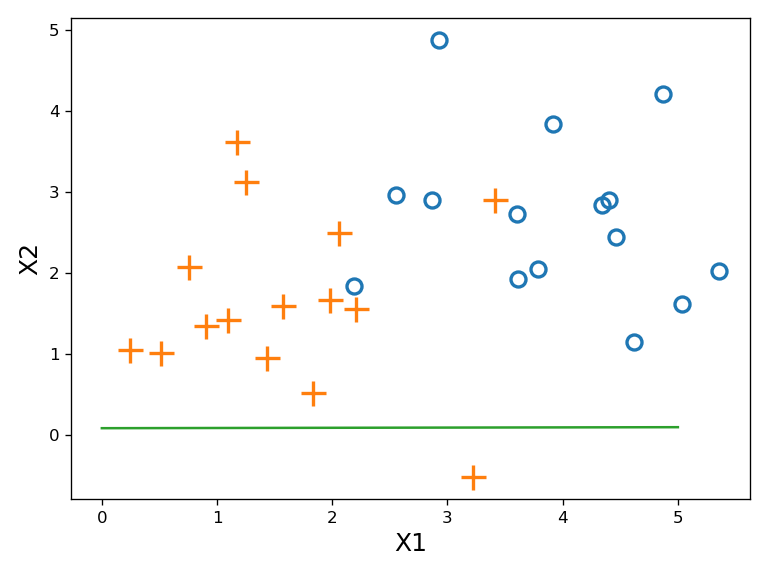

14
[2.20187926 1.55037904]
[1.5681177  1.58694447]
[1.98132744 1.65751725]
[1.43787012 0.94988095]
[0.75290866 2.07120745]
[1.17712566 3.61299453]
[0.51623392 1.00934356]
[0.24054413 1.04043617]
[1.09711747 1.41997873]
[1.25016773 3.12253937]
[2.06046987 2.49174079]
[1.83529855 0.51150602]
[0.90370806 1.33785384]
[3.41063473 2.8947868 ]


<IPython.core.display.Javascript object>


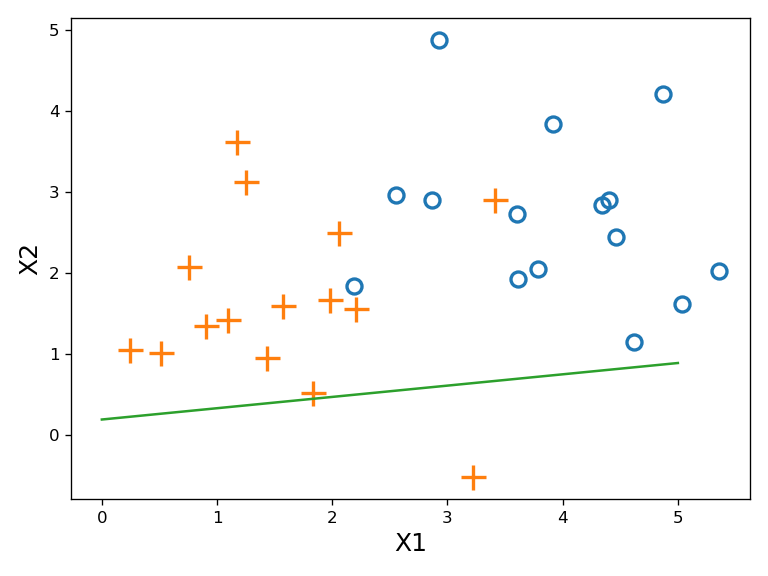

14
[2.20187926 1.55037904]
[1.5681177  1.58694447]
[1.98132744 1.65751725]
[1.43787012 0.94988095]
[0.75290866 2.07120745]
[1.17712566 3.61299453]
[0.51623392 1.00934356]
[0.24054413 1.04043617]
[1.09711747 1.41997873]
[1.25016773 3.12253937]
[2.06046987 2.49174079]
[0.90370806 1.33785384]
[3.41063473 2.8947868 ]


<IPython.core.display.Javascript object>


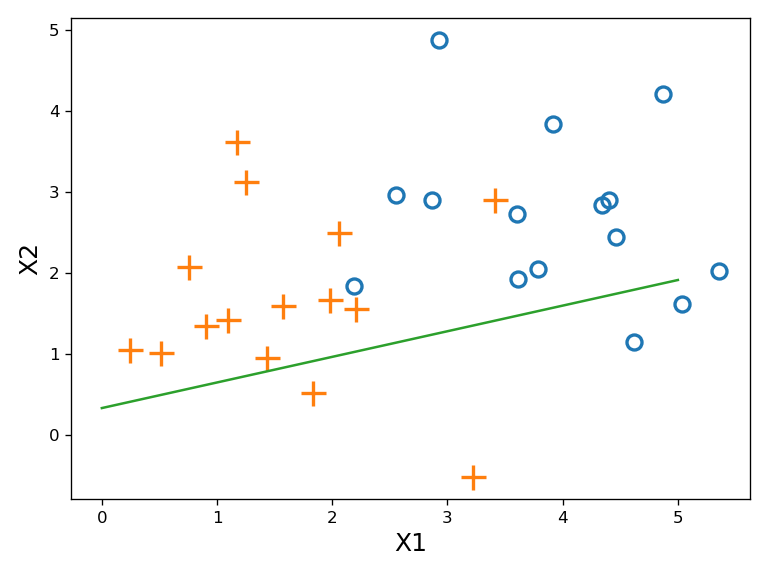

16
[2.20187926 1.55037904]
[4.61538729 1.14450927]
[1.5681177  1.58694447]
[1.98132744 1.65751725]
[5.03620906 1.61503562]
[1.43787012 0.94988095]
[0.75290866 2.07120745]
[1.17712566 3.61299453]
[0.51623392 1.00934356]
[0.24054413 1.04043617]
[1.09711747 1.41997873]
[5.35810136 2.0182261 ]
[1.25016773 3.12253937]
[2.06046987 2.49174079]
[0.90370806 1.33785384]
[3.41063473 2.8947868 ]


<IPython.core.display.Javascript object>


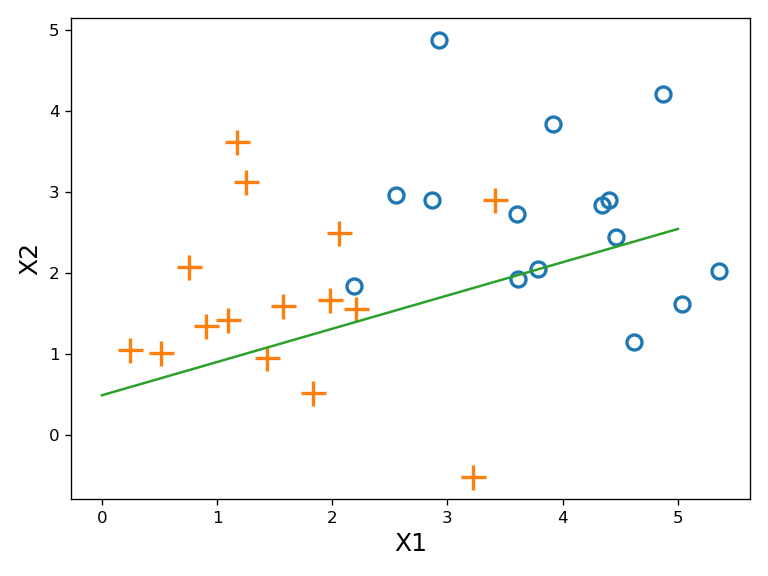

16
[2.20187926 1.55037904]
[4.61538729 1.14450927]
[1.5681177  1.58694447]
[1.98132744 1.65751725]
[5.03620906 1.61503562]
[0.75290866 2.07120745]
[1.17712566 3.61299453]
[0.51623392 1.00934356]
[3.61168713 1.9170854 ]
[0.24054413 1.04043617]
[1.09711747 1.41997873]
[5.35810136 2.0182261 ]
[1.25016773 3.12253937]
[2.06046987 2.49174079]
[0.90370806 1.33785384]
[3.41063473 2.8947868 ]
[4.46362621 2.4463212 ]


<IPython.core.display.Javascript object>


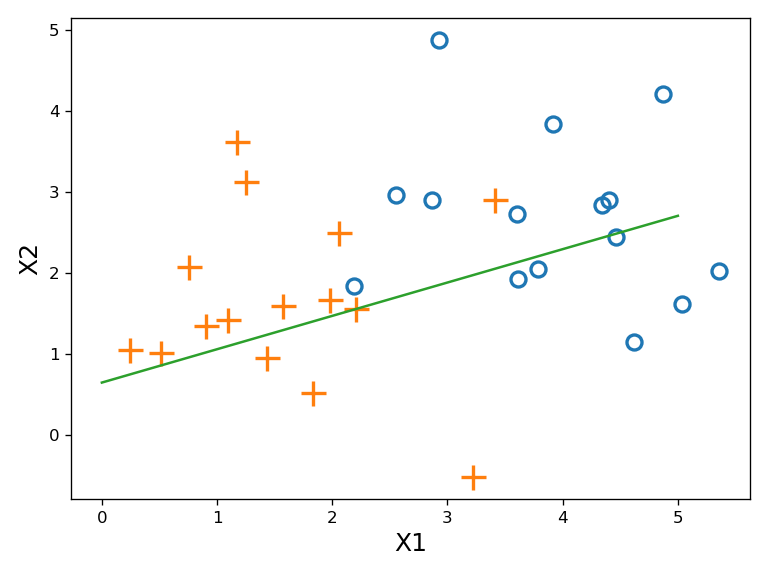

17
[4.61538729 1.14450927]
[1.5681177  1.58694447]
[1.98132744 1.65751725]
[5.03620906 1.61503562]
[0.75290866 2.07120745]
[1.17712566 3.61299453]
[0.51623392 1.00934356]
[3.61168713 1.9170854 ]
[0.24054413 1.04043617]
[1.09711747 1.41997873]
[5.35810136 2.0182261 ]
[1.25016773 3.12253937]
[2.06046987 2.49174079]
[0.90370806 1.33785384]
[3.41063473 2.8947868 ]
[4.46362621 2.4463212 ]


<IPython.core.display.Javascript object>


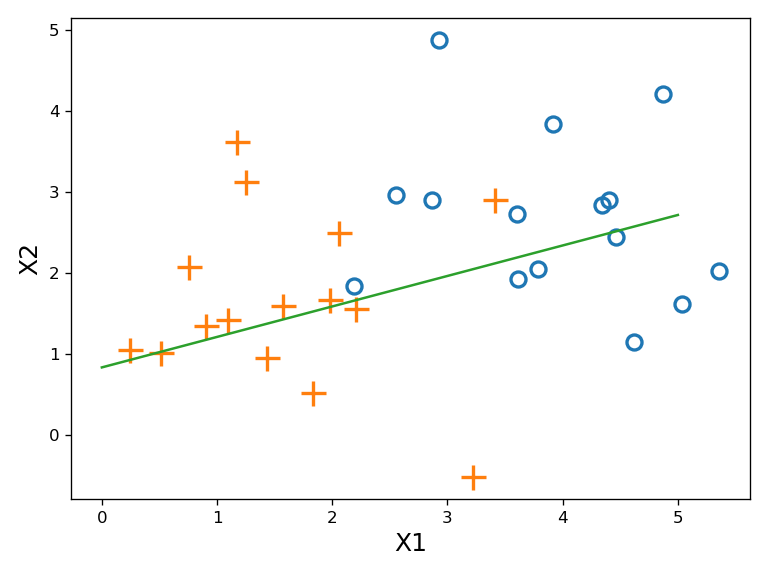

16
[4.61538729 1.14450927]
[1.5681177  1.58694447]
[1.98132744 1.65751725]
[5.03620906 1.61503562]
[0.75290866 2.07120745]
[3.784991   2.04930521]
[1.17712566 3.61299453]
[3.61168713 1.9170854 ]
[0.24054413 1.04043617]
[1.09711747 1.41997873]
[5.35810136 2.0182261 ]
[1.25016773 3.12253937]
[2.06046987 2.49174079]
[0.90370806 1.33785384]
[3.41063473 2.8947868 ]
[4.46362621 2.4463212 ]


<IPython.core.display.Javascript object>


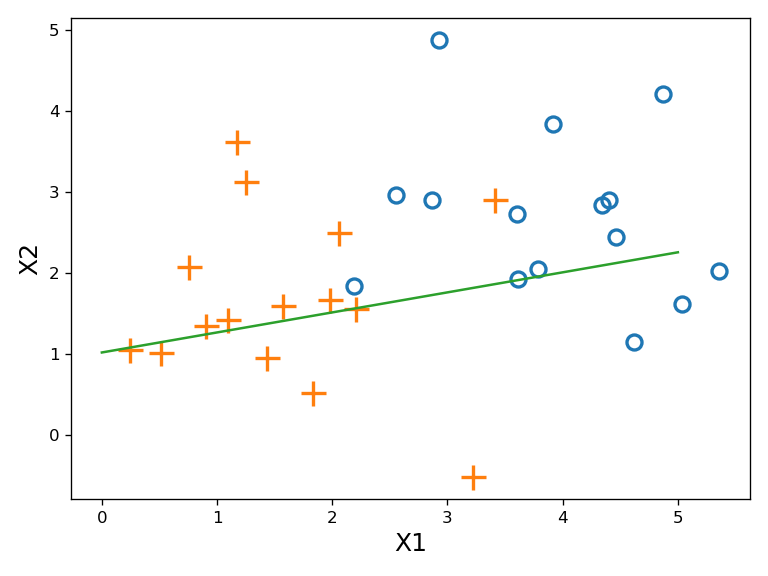

12
[4.61538729 1.14450927]
[1.5681177  1.58694447]
[1.98132744 1.65751725]
[5.03620906 1.61503562]
[0.75290866 2.07120745]
[1.17712566 3.61299453]
[1.09711747 1.41997873]
[5.35810136 2.0182261 ]
[1.25016773 3.12253937]
[2.06046987 2.49174079]
[3.41063473 2.8947868 ]
[4.46362621 2.4463212 ]


<IPython.core.display.Javascript object>


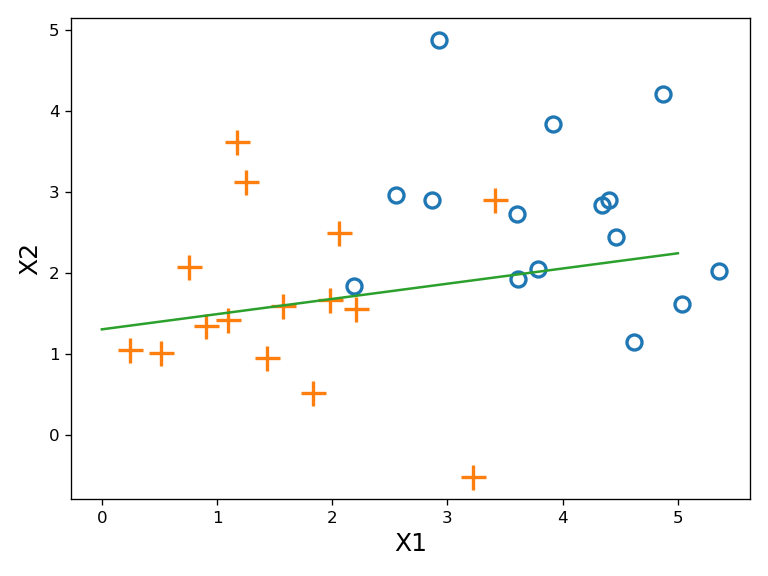

9
[4.61538729 1.14450927]
[1.5681177  1.58694447]
[1.98132744 1.65751725]
[5.03620906 1.61503562]
[0.75290866 2.07120745]
[1.17712566 3.61299453]
[3.61168713 1.9170854 ]
[1.25016773 3.12253937]
[2.06046987 2.49174079]
[3.41063473 2.8947868 ]
[4.46362621 2.4463212 ]


<IPython.core.display.Javascript object>


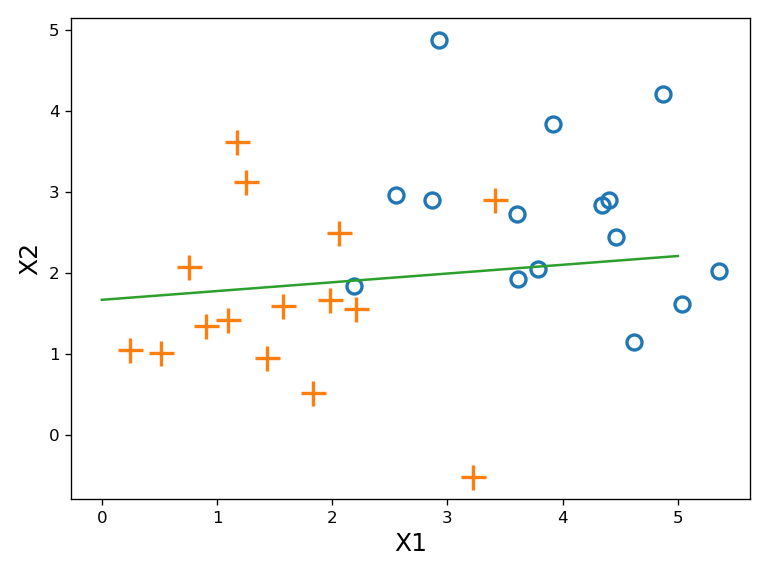

11
[4.61538729 1.14450927]
[1.98132744 1.65751725]
[5.03620906 1.61503562]
[0.75290866 2.07120745]
[1.17712566 3.61299453]
[1.25016773 3.12253937]
[2.06046987 2.49174079]
[3.41063473 2.8947868 ]
[4.46362621 2.4463212 ]


<IPython.core.display.Javascript object>


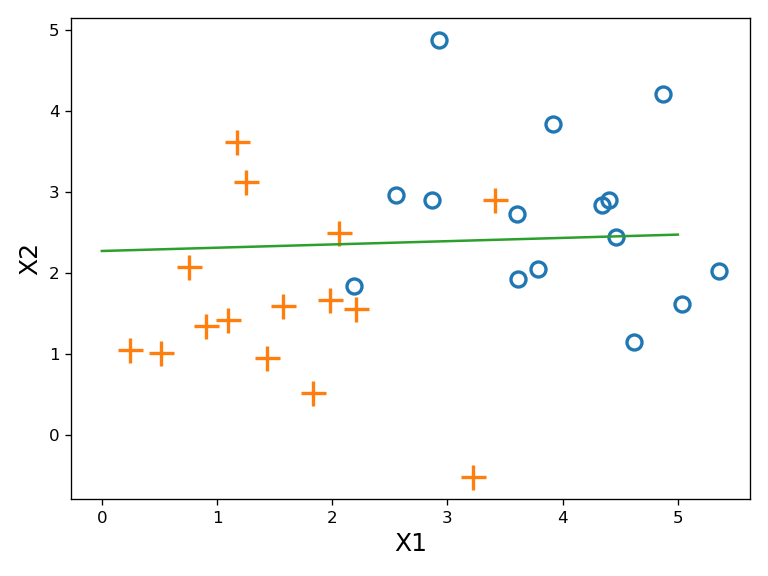

11
[4.61538729 1.14450927]
[2.1929474  1.83456433]
[0.75290866 2.07120745]
[1.17712566 3.61299453]
[3.61168713 1.9170854 ]
[1.25016773 3.12253937]
[2.06046987 2.49174079]
[3.41063473 2.8947868 ]
[4.46362621 2.4463212 ]


<IPython.core.display.Javascript object>


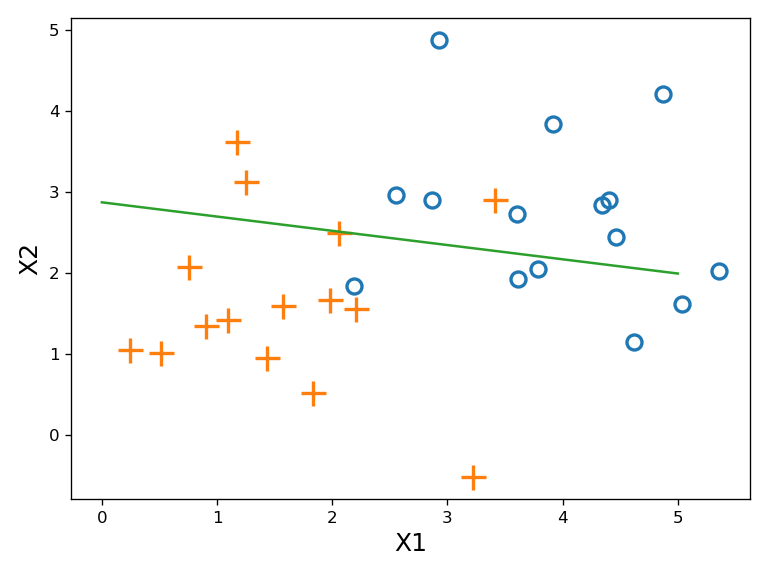

8
[4.61538729 1.14450927]
[2.1929474  1.83456433]
[1.17712566 3.61299453]
[1.25016773 3.12253937]
[3.41063473 2.8947868 ]
[4.46362621 2.4463212 ]


<IPython.core.display.Javascript object>


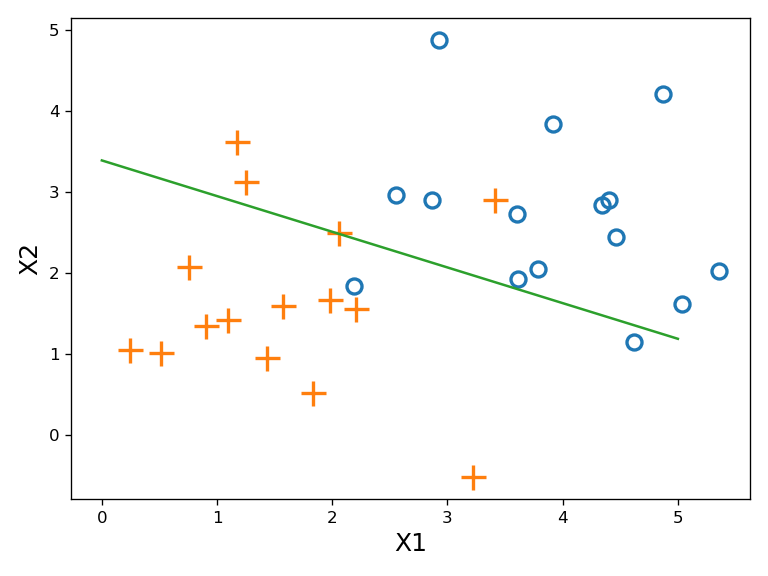

6
[4.61538729 1.14450927]
[2.1929474  1.83456433]
[1.98132744 1.65751725]
[1.17712566 3.61299453]
[1.25016773 3.12253937]
[3.41063473 2.8947868 ]
[4.46362621 2.4463212 ]


<IPython.core.display.Javascript object>


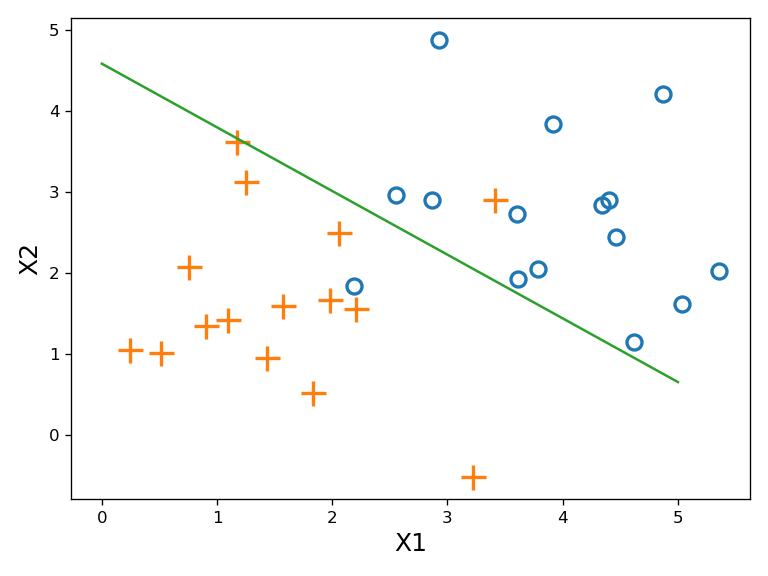

2
[2.1929474  1.83456433]
[1.17712566 3.61299453]
[3.41063473 2.8947868 ]


<IPython.core.display.Javascript object>


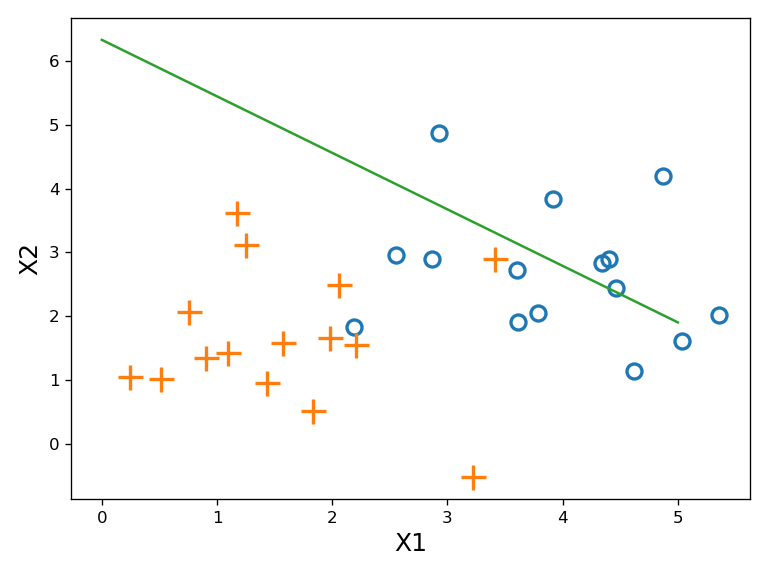

8
[4.61538729 1.14450927]
[2.1929474  1.83456433]
[3.41063473 2.8947868 ]


<IPython.core.display.Javascript object>


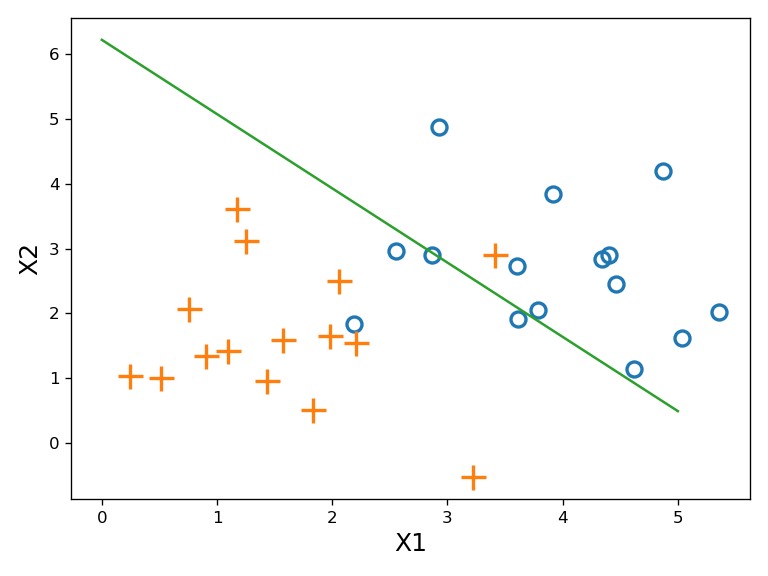

5
[2.1929474  1.83456433]
[3.41063473 2.8947868 ]


<IPython.core.display.Javascript object>


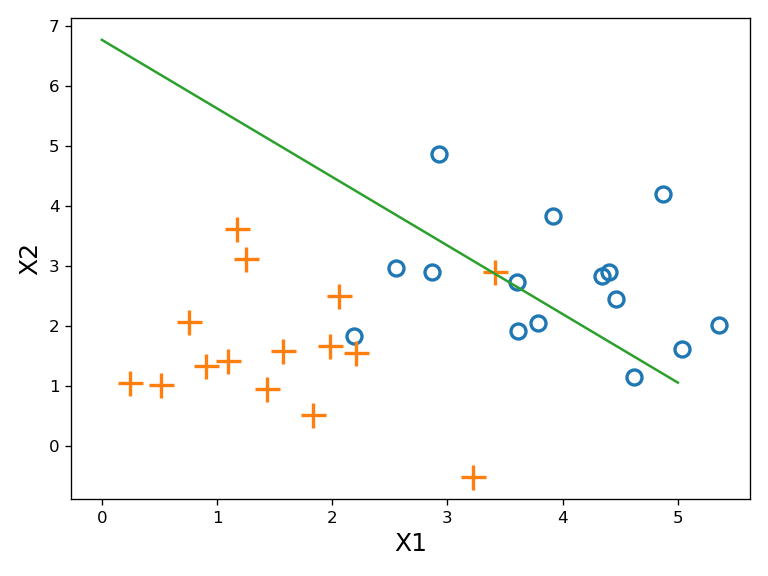

7
[4.61538729 1.14450927]
[2.1929474  1.83456433]
[2.06046987 2.49174079]
[3.41063473 2.8947868 ]


<IPython.core.display.Javascript object>


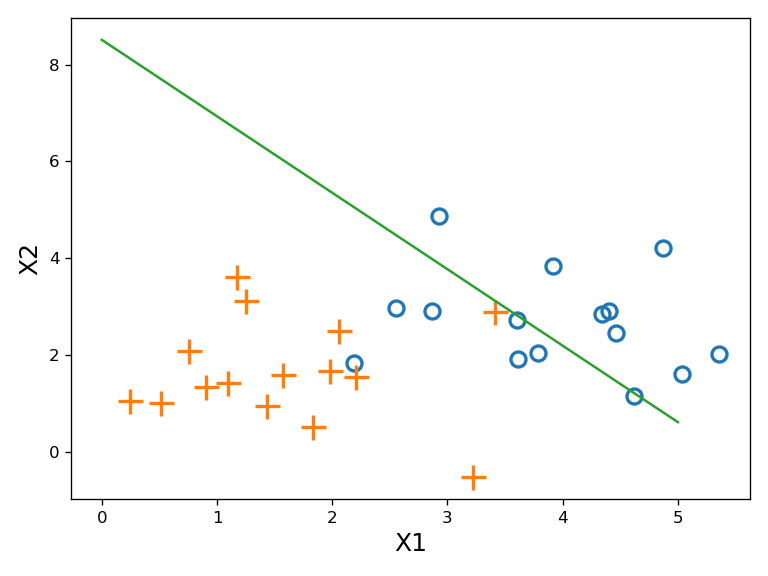

7
[4.61538729 1.14450927]
[2.1929474  1.83456433]
[3.41063473 2.8947868 ]


<IPython.core.display.Javascript object>


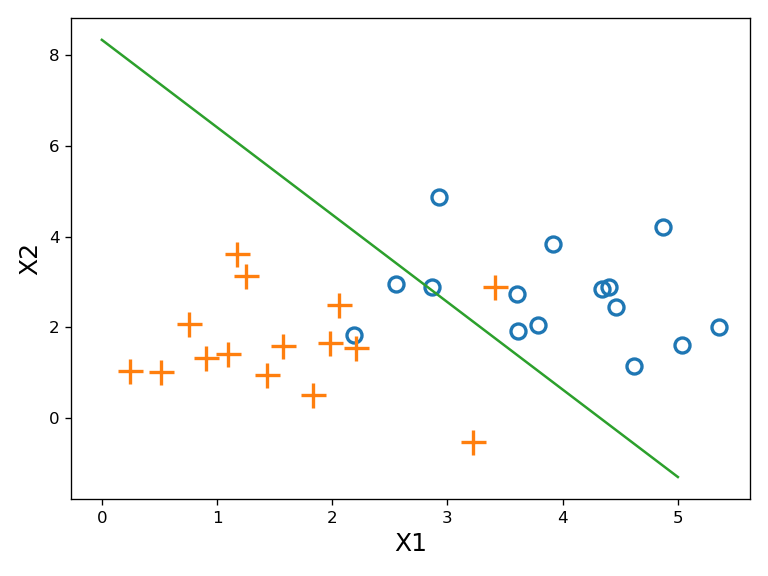

3
[2.1929474  1.83456433]
[3.41063473 2.8947868 ]


<IPython.core.display.Javascript object>


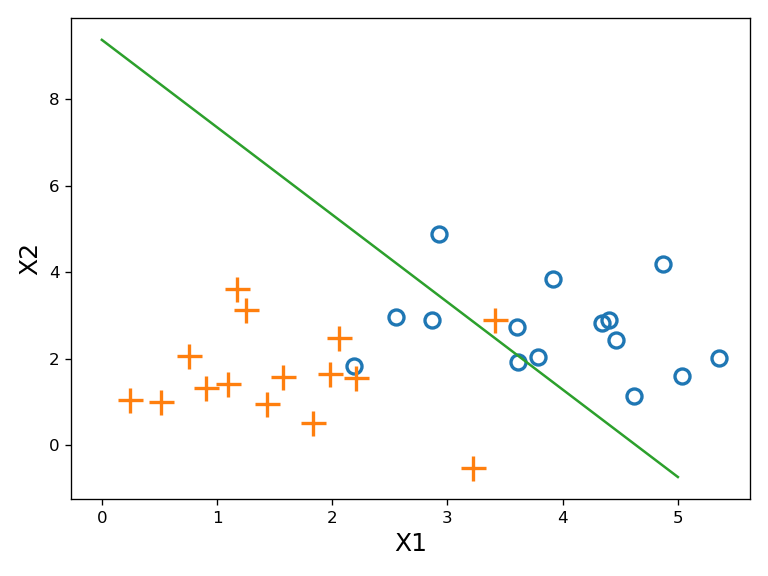

5
[2.1929474  1.83456433]
[3.41063473 2.8947868 ]


/tmp/ipykernel_5331/1966786141.py:89: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


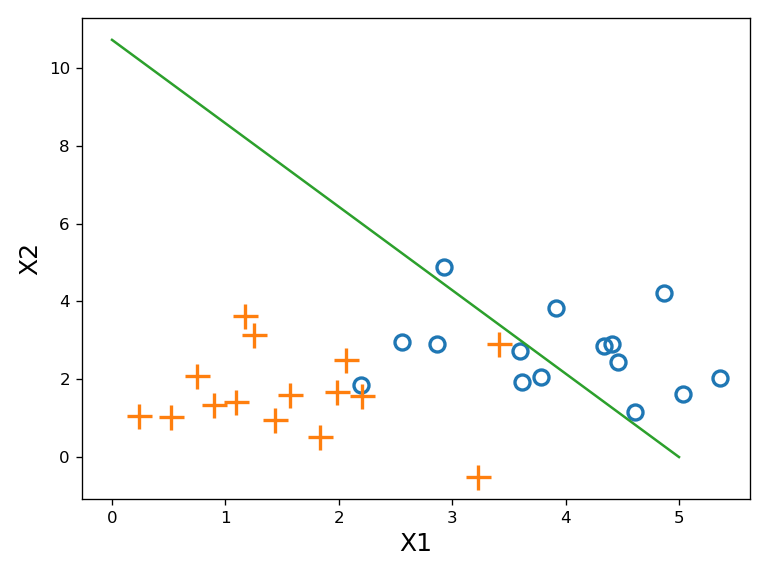

6


(array([0.07907015, 0.03681941]), -0.39500000000000024)

In [ ]:
train_perceptron3(X,y,np.array([0.1,1]), 0, 20, 0.005)

We see that the accuracy slowly improves over the course of the 20 epochs. 

In other words, the machine... IT IS LEARNING.

**Problem 3c**

Adjust the weights, or bias, or number of epochs, or learning rate, or all of them, to see how the changes affect the output of the perceptron. 

What do you notice as these changes are made?

In [ ]:
train_perceptron( # complete

*write answer here*

It is possible to build a perceptron that gets worse at classification. This can happen if the learning rate is extremely large, essentially flipping on or off the activation for every source during each epoch. 

It is also possible to build a perceptron that effectively never learns anything if the initial weights are extremely far from the optimal solution. The weights effectively define a line (or hyperplane in more than two dimensions) to separate the classes. If the line is very distant from the data itself, then the weights cannot be easily updated to improve the classification. 

You have now built a perceptron. You have also seen it's limitations.

The strength of machine learning solutions lies in their ability to identify and capture non-linear structure within data. 

But the perceptron is almost too non-linear. For inputs that are close to the activation boundary, very small changes in the weights can rapidly lead to an extreme difference in outcome. 

It would be better if our adjustments led to more gradual changes, so that, if possible, the quality of the model improved during each epoch of the classifier. This can be achieved with a different model for our artificial neuron.

Consider, for instance, a neuron that is activated via the sigmoid function:

$$\sigma(z) \equiv \frac{1}{1 + e^{-z}}$$

where $z$ is the previously defined activation for a neuron: $w \cdot x - b$

We can visually show the difference between the perceptron and sigmoid neurons.  

In [ ]:
fig, ax = plt.subplots()
ax. plot([-10, 0, 0, 10], [0,0,1,1], lw=3, label='Perceptron')
xgrid = np.linspace(-10, 10, 1000)
ax.plot(xgrid, 1/(1 + np.exp(-xgrid)), lw=2, label='Sigmoid')
ax.set_xlim(-7.5, 7.5)
ax.legend()
ax.set_xlabel('input*weights - bias', fontsize=14)
ax.set_ylabel('output', fontsize=14)
fig.tight_layout()

The above plot shows that the sigmoid function is a "smooth" version of the perceptron. We can exploit this smoothness to achieve better learning outcomes. Small changes in the weights and biases will produce small changes in the sigmoid function, enabling gradual improvement, which cannot be said for the perceptron near the region of activation.  


This will prove important in the next lecture.

## Challenge Problem

Train a perceptron to classify the number 8 in the handwritten digits data set. 

*Hint* - you will need to convert the 2d data into a vector format.

## Appendix

Functions to load plots shown in the notebook. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

fig, ax = plt.subplots(figsize=(4,4))

ax.imshow(X[41].reshape(28,28)[3:-3,3:-3], 
          cmap='binary')
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.savefig('./images/number8.png')